In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
training=pd.read_csv('Google_Stock_Price_Train.csv')

In [75]:
training.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [76]:
training_set=training.iloc[:,1:2].values

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
sc=MinMaxScaler()

In [79]:
training_set=sc.fit_transform(training_set)

In [80]:
x_train=training_set[:1257]

In [81]:
y_train=training_set[1:1258]

In [82]:
x_train=np.reshape(x_train,(1257,1,1))

In [83]:
from keras.models import Sequential
from keras.layers import Dense , LSTM

In [84]:
model=Sequential()

In [85]:
model.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [86]:
model.add(Dense(units=1))

In [87]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [88]:
model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s 762us/step - loss: 0.8766
Epoch 2/200
1257/1257 [==============================] - 0s 57us/step - loss: 0.7173
Epoch 3/200
1257/1257 [==============================] - 0s 57us/step - loss: 0.5882
Epoch 4/200
1257/1257 [==============================] - 0s 59us/step - loss: 0.4839
Epoch 5/200
1257/1257 [==============================] - 0s 63us/step - loss: 0.3996
Epoch 6/200
1257/1257 [==============================] - 0s 60us/step - loss: 0.3312
Epoch 7/200
1257/1257 [==============================] - 0s 57us/step - loss: 0.2756
Epoch 8/200
1257/1257 [==============================] - 0s 57us/step - loss: 0.2303
Epoch 9/200
1257/1257 [==============================] - 0s 60us/step - loss: 0.1937
Epoch 10/200
1257/1257 [==============================] - 0s 63us/step - loss: 0.1642
Epoch 11/200
1257/1257 [==============================] - 0s 58us/step - loss: 0.1406
Epoch 12/200
1257/1257 [==============================] - 0s 5

1257/1257 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 97/200
1257/1257 [==============================] - 0s 58us/step - loss: 0.0010
Epoch 98/200
1257/1257 [==============================] - 0s 60us/step - loss: 9.4856e-04
Epoch 99/200
1257/1257 [==============================] - 0s 59us/step - loss: 8.7801e-04
Epoch 100/200
1257/1257 [==============================] - 0s 59us/step - loss: 8.1860e-04
Epoch 101/200
1257/1257 [==============================] - 0s 58us/step - loss: 7.6906e-04
Epoch 102/200
1257/1257 [==============================] - 0s 57us/step - loss: 7.2671e-04
Epoch 103/200
1257/1257 [==============================] - 0s 58us/step - loss: 6.9192e-04
Epoch 104/200
1257/1257 [==============================] - 0s 57us/step - loss: 6.6341e-04
Epoch 105/200
1257/1257 [==============================] - 0s 57us/step - loss: 6.3764e-04
Epoch 106/200
1257/1257 [==============================] - 0s 57us/step - loss: 6.1735e-04
Epoch 107/200
1257/1257 

1257/1257 [==============================] - 0s 65us/step - loss: 2.8372e-04
Epoch 187/200
1257/1257 [==============================] - 0s 63us/step - loss: 2.8169e-04
Epoch 188/200
1257/1257 [==============================] - 0s 66us/step - loss: 2.8169e-04
Epoch 189/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.8121e-04
Epoch 190/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.8362e-04
Epoch 191/200
1257/1257 [==============================] - 0s 62us/step - loss: 2.8086e-04
Epoch 192/200
1257/1257 [==============================] - 0s 61us/step - loss: 2.8234e-04
Epoch 193/200
1257/1257 [==============================] - 0s 63us/step - loss: 2.7986e-04
Epoch 194/200
1257/1257 [==============================] - 0s 62us/step - loss: 2.8140e-04
Epoch 195/200
1257/1257 [==============================] - 0s 61us/step - loss: 2.8041e-04
Epoch 196/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.7809e-04
Epoch 197/200

In [34]:
test_set=pd.read_csv('Google_Stock_Price_Test.csv')

In [35]:
stock_price=test_set.iloc[:,1:2].values

In [37]:
x_test=sc.fit_transform(stock_price)

In [39]:
x_test=np.reshape(x_test,(20,1,1))

In [40]:
y_pred=model.predict(x_test)

In [44]:
y_pred=sc.inverse_transform(y_pred)

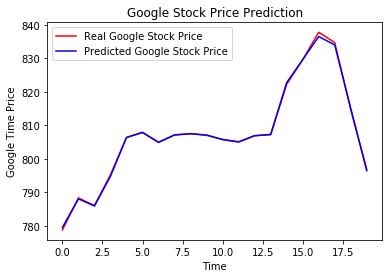

In [45]:
plt.plot(stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [51]:
stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [53]:
real_stock_price = pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price = real_stock_price.iloc[:,1:2].values


In [89]:
predicted_stock_price_train = model.predict(x_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)


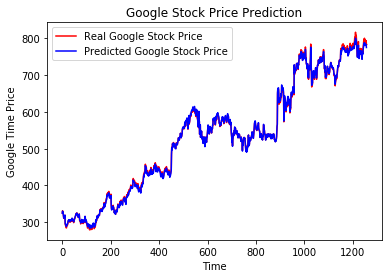

In [90]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()